In [6]:
from skimage.io import imread
from tnia.plotting.plt_helper import random_label_cmap
from tnia.deeplearning.dl_helper import quantile_normalization 
import numpy as np
from pathlib import Path
from cellpose import models, io
import os
from tnia.plotting.plt_helper import imshow_multi2d, random_label_cmap

#tnia_images_path = Path(r"D:\images")
tnia_images_path = Path(r'/home/bnorthan/images')
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2024_07_11_cellpose_with_dentrites')
model_path = os.path.join(parent_path,'models')


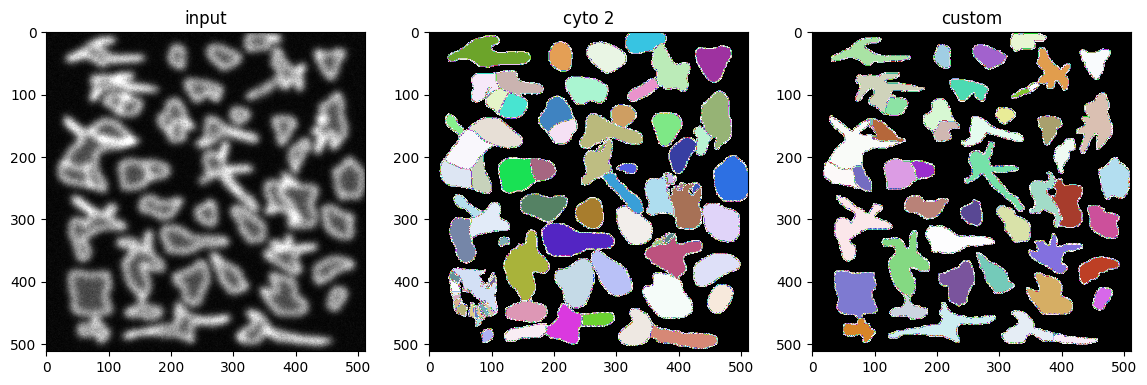

In [11]:
test_name='phantom1.tif'
testim = imread(parent_path  / test_name) 
testim = quantile_normalization(testim,.01,0.998)
model_name = 'cellpose_testing'

model= models.CellposeModel(gpu=True, model_type=None, pretrained_model=os.path.join(model_path,'models',model_name))
model_cyto2 = models.CellposeModel(gpu=True, model_type="cyto2")


labels = model.eval(testim, channels=[0, 1], flow_threshold=0, cellprob_threshold=0)[0]
labels_cyto2 = model_cyto2.eval(testim, channels=[0, 1], diameter=35, flow_threshold=0, cellprob_threshold=0)[0]

fig = imshow_multi2d([testim,labels_cyto2, labels],['input','cyto 2', 'custom'],1,3, width=14, height=8,colormaps=['gray', random_label_cmap(), random_label_cmap()])
